In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
for col in train.columns:
    print(f"column name:{col}")
    print(f"unique values:{train[col].unique()}")
    print("----\n")

column name:PassengerId
unique values:[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 

In [7]:
Pclass_1 = train[train.Pclass == 1]

In [8]:
Pclass_1.Cabin.unique() #A,B,C,D,E, T

array(['C85', 'C123', 'E46', 'C103', 'A6', 'C23 C25 C27', nan, 'B78',
       'D33', 'B30', 'C52', 'B28', 'C83', 'E31', 'A5', 'D10 D12', 'D26',
       'C110', 'B58 B60', 'D47', 'B86', 'C2', 'E33', 'B19', 'A7', 'C49',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'C62 C64', 'E24', 'C90',
       'C45', 'E8', 'B101', 'D45', 'C46', 'D30', 'D11', 'B3', 'D6',
       'B8

In [9]:
Pclass_2 = train[train.Pclass == 2]

In [10]:
Pclass_2.Cabin.unique() #D,E,F

array([nan, 'D56', 'F33', 'E101', 'F2', 'F4', 'D', 'E77'], dtype=object)

In [11]:
Pclass_3 = train[train.Pclass == 3]

In [12]:
Pclass_3.Cabin.unique() #E,F,G

array([nan, 'G6', 'F G73', 'F E69', 'E10', 'F G63', 'E121', 'F38'],
      dtype=object)

In [13]:
train['modified_cabin'] = train['Cabin'].str[0]

In [14]:
test['modified_cabin'] = test['Cabin'].str[0]

In [15]:
train['modified_cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [16]:
test['modified_cabin'].unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [17]:
train[train['Cabin']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,modified_cabin
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [18]:
for class1 in train['Pclass'].unique():
    mode_modified_cabin = train.loc[train['Pclass'] == class1, 'modified_cabin'].mode()
    print(mode_modified_cabin)
    train.loc[(train['Pclass'] == class1) & (train['modified_cabin'].isnull()), 'modified_cabin'] = mode_modified_cabin[0]

0    F
Name: modified_cabin, dtype: object
0    C
Name: modified_cabin, dtype: object
0    F
Name: modified_cabin, dtype: object


In [19]:
for class1 in test['Pclass'].unique():
    mode_modified_cabin = test.loc[test['Pclass'] == class1, 'modified_cabin'].mode()
    print(mode_modified_cabin)
    test.loc[(train['Pclass'] == class1) & (test['modified_cabin'].isnull()), 'modified_cabin'] = mode_modified_cabin[0]

0    F
Name: modified_cabin, dtype: object
0    F
Name: modified_cabin, dtype: object
0    C
Name: modified_cabin, dtype: object


In [20]:
train[train['modified_cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,modified_cabin


In [21]:
train.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
modified_cabin      0
dtype: int64

In [22]:
train['Age'] = train['Age'].fillna(train['Age'].mode()[0])

In [23]:
test['Age'] = test['Age'].fillna(test['Age'].mode()[0])

In [24]:
test.isna().sum()

PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin             327
Embarked            0
modified_cabin      0
dtype: int64

**EDA**

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,modified_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,F
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,F
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,F


<Axes: xlabel='Pclass', ylabel='count'>

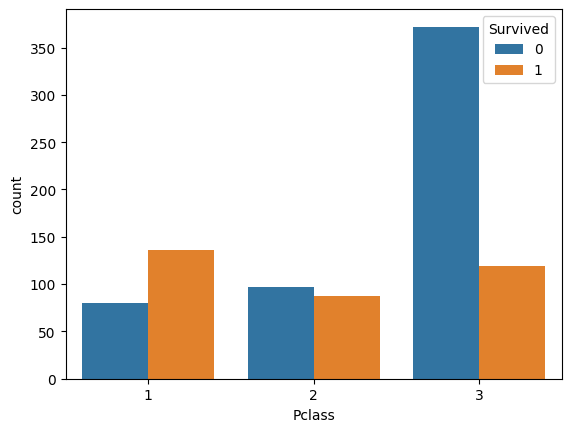

In [26]:
sns.countplot(x='Pclass',hue='Survived',data=train)

Observation: Passengers of class 3 are not survived
    
feature to consider class

<Axes: xlabel='Sex', ylabel='count'>

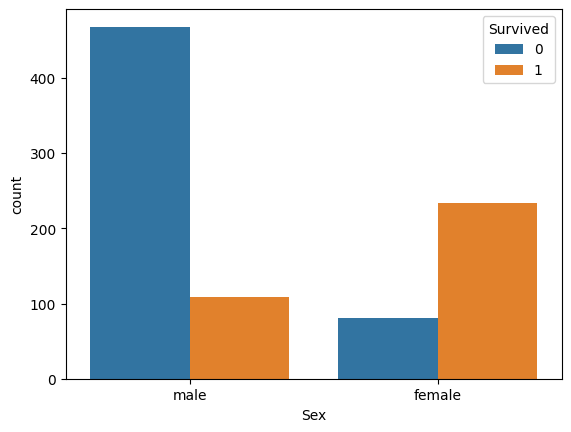

In [27]:
sns.countplot(x='Sex',hue='Survived', data=train)

Observation: Males are less survived
    
feature to consider: Sex

<Axes: xlabel='SibSp', ylabel='count'>

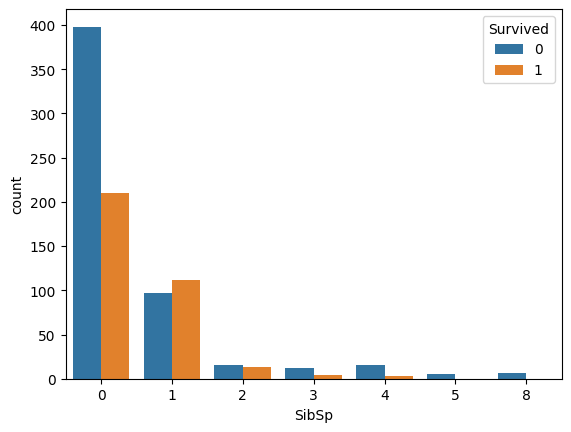

In [28]:
sns.countplot(x='SibSp',hue='Survived',data=train)

Observation: People with Sibsp 0 ie., single person without sibling/spouse are not survived
    
feature to consider: SibSp

<Axes: xlabel='Parch', ylabel='count'>

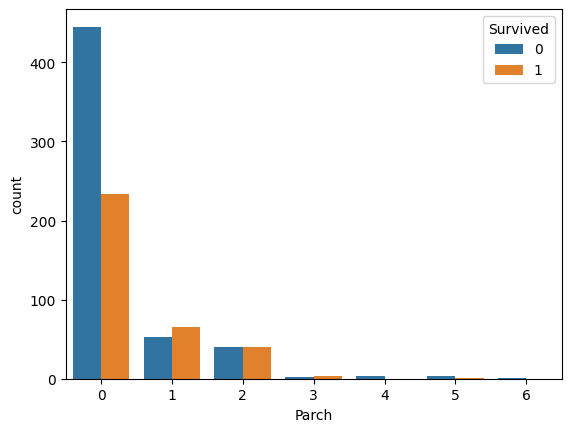

In [29]:
sns.countplot(x='Parch',data=train, hue='Survived')

Observation: People in Parch 0 i.e, single person without parents/children are not survived
    
feature to consider: Parch

<Axes: xlabel='Embarked', ylabel='count'>

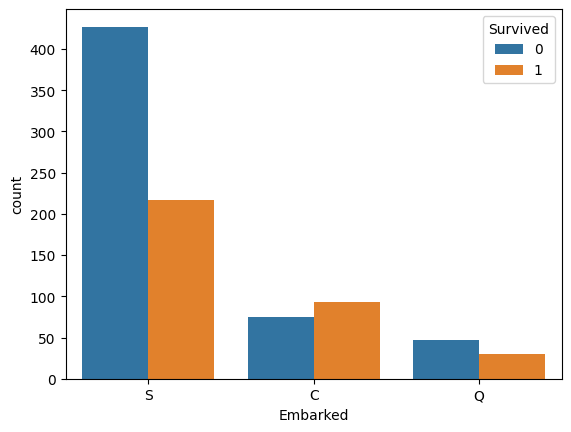

In [30]:
sns.countplot(x='Embarked',data=train,hue='Survived')

Observation: people Embarked from s are not suvived
    
feature to consider: Embarked

<Axes: xlabel='modified_cabin', ylabel='count'>

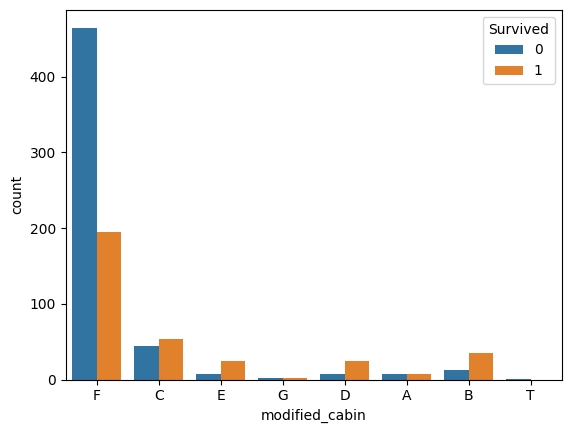

In [31]:
sns.countplot(x='modified_cabin',data=train,hue='Survived')

Observation: People in cabin F are not survived
    
Feature to consider: modified_cabin

In [32]:
train[['modified_cabin','Fare']].groupby(['modified_cabin']).describe()

Fare                                                      \
                count        mean         std      min      25%       50%   
modified_cabin                                                              
A                15.0   39.623887   17.975333   0.0000  30.8479  35.50000   
B                47.0  113.505764  109.301500   0.0000  57.0000  80.00000   
C                99.0   90.736109   79.267897   0.0000  30.5000  66.60000   
D                33.0   57.244576   29.592832  12.8750  30.0000  53.10000   
E                32.0   46.026694   32.608315   8.0500  26.1125  45.18125   
F               660.0   15.651811   12.755814   0.0000   7.8542  10.33540   
G                 4.0   13.581250    3.601222  10.4625  10.4625  13.58125   
T                 1.0   35.500000         NaN  35.5000  35.5000  35.50000   

                                     
                      75%       max  
modified_cabin                       
A                50.24790   81.8583  
B               120.00000  512.3292  
C               122.26665  512.3292  
D                77.28750  113.2750  
E                56.15730  134.5000  
F                20.21250   73.5000  
G                16.70000   16.7000  
T                35.50000   35.5000

In [33]:
train[['Pclass','Fare']].groupby(['Pclass']).describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

**Model Training**

In [34]:
X = train[['Pclass','Sex','Age','SibSp','Parch','Embarked','modified_cabin']]
y = train['Survived']

In [35]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked,modified_cabin
0,3,male,22.0,1,0,S,F
1,1,female,38.0,1,0,C,C
2,3,female,26.0,0,0,S,F
3,1,female,35.0,1,0,S,C
4,3,male,35.0,0,0,S,F
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,F
887,1,female,19.0,0,0,S,B
888,3,female,24.0,1,2,S,F
889,1,male,26.0,0,0,C,C


In [36]:
encoding = LabelEncoder()

X['Sex'] = encoding.fit_transform(X['Sex'])
X['Embarked'] = encoding.fit_transform(X['Embarked'])
X['modified_cabin'] = encoding.fit_transform(X['modified_cabin'])

/tmp/ipykernel_17/1450879122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = encoding.fit_transform(X['Sex'])
/tmp/ipykernel_17/1450879122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = encoding.fit_transform(X['Embarked'])
/tmp/ipykernel_17/1450879122.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [37]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked,modified_cabin
0,3,1,22.0,1,0,2,5
1,1,0,38.0,1,0,0,2
2,3,0,26.0,0,0,2,5
3,1,0,35.0,1,0,2,2
4,3,1,35.0,0,0,2,5
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,2,5
887,1,0,19.0,0,0,2,1
888,3,0,24.0,1,2,2,5
889,1,1,26.0,0,0,0,2


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.25)

In [39]:
model = DecisionTreeClassifier(criterion='entropy')

In [40]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
model.score(X_test,y_test)

0.8430493273542601

In [42]:
accuracy1 = []
for k in range(2,30,2):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=k)
    model.fit(X_train,y_train)
    accuracy1.append(model.score(X_test,y_test))

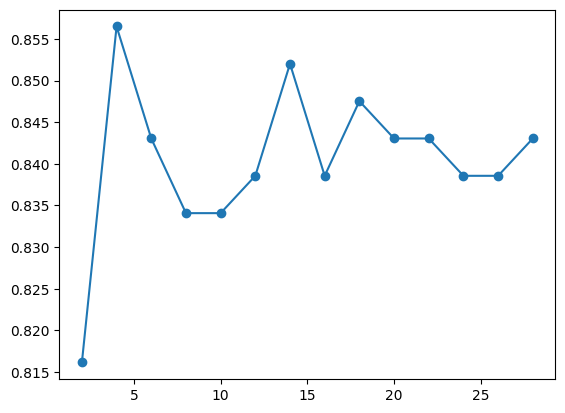

In [43]:
plt.plot(range(2,30,2),accuracy1,marker='o')

In [44]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8565022421524664

In [45]:
model.feature_importances_

array([0.16665572, 0.45866217, 0.16943622, 0.10508665, 0.00676907,
       0.02509755, 0.06829263])

We can remove Parch from the dataset as its feature importance is 0

**KNN Algorithm**

In [46]:
accuracy3 = []
for k in range(1,12,2):
    model_knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    model.fit(X_train,y_train)
    accuracy3.append(model.score(X_test,y_test))

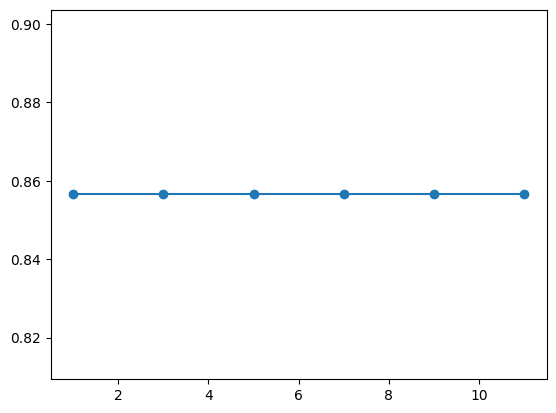

In [47]:
plt.plot(range(1,12,2),accuracy3,marker='o')

In [48]:
model_knn = KNeighborsClassifier(n_neighbors=5,weights='distance',p=1)
model_knn.fit(X_train,y_train)
model_knn.score(X_test,y_test)

0.7982062780269058

**Test Data Predictions**

In [49]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,modified_cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,F
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,C
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,F
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,C
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,F


In [50]:
input_test_data = test[['Pclass','Sex','Age','SibSp','Parch','Embarked','modified_cabin']]

In [51]:
input_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,modified_cabin
0,3,male,34.5,0,0,Q,F
1,3,female,47.0,1,0,S,C
2,2,male,62.0,0,0,Q,F
3,3,male,27.0,0,0,S,C
4,3,female,22.0,1,1,S,F


**Feature Engineering**

In [52]:
encoding = LabelEncoder()

input_test_data['Sex'] = encoding.fit_transform(input_test_data['Sex'])
input_test_data['Embarked'] = encoding.fit_transform(input_test_data['Embarked'])
input_test_data['modified_cabin'] = encoding.fit_transform(input_test_data['modified_cabin'])

/tmp/ipykernel_17/3896153350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_test_data['Sex'] = encoding.fit_transform(input_test_data['Sex'])
/tmp/ipykernel_17/3896153350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_test_data['Embarked'] = encoding.fit_transform(input_test_data['Embarked'])
/tmp/ipykernel_17/3896153350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [53]:
input_test_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,modified_cabin
0,3,1,34.5,0,0,1,5
1,3,0,47.0,1,0,2,2
2,2,1,62.0,0,0,1,5
3,3,1,27.0,0,0,2,2
4,3,0,22.0,1,1,2,5
...,...,...,...,...,...,...,...
413,3,1,21.0,0,0,2,5
414,1,0,39.0,0,0,0,2
415,3,1,38.5,0,0,2,5
416,3,1,21.0,0,0,2,5


In [54]:
model.predict(input_test_data)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
test_data_predictions = model.predict(input_test_data)

In [56]:
result_df = pd.DataFrame({
    'PassengerId': test['PassengerId'],  # Extract IDs from the original DataFrame
    'Survived': test_data_predictions
})

# Save to Excel
result_df.to_csv('/kaggle/working/submission.csv', index=False)

In [57]:
sub = pd.read_csv('/kaggle/working/submission.csv')

In [58]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
